# Dolandırıcılık Tespiti için Sentetik Finansal Veri Kümeleri

### Sentetik Finansal Veri Kümeleri: Genel Bir Bakış

**Dil: Python**

İnternetin ortaya çıkışından bu yana dijital devrim yükseliyor ve hayatımızın her alanına sızdı. En önemli dijital devrimlerden biri finansal sistemde ve özellikle dünyanın herhangi bir yerinden birisine dijital olarak para işlemi yapılmasıdır. İnternetten ürün satın almak, arkadaşlara para göndermek, banka hesabına para yatırmak, yatırım amaçlı vb. dijital işlemler günlük hayatın bir parçası haline geldi, birçok faydası olduğu gibi dolandırıcılık faaliyetlerinin de önünü açtı. İnsanlar kara para aklamak ve parayı yasal bir kaynaktan geliyormuş gibi göstermek için dijital para işlemleri aracını kullanmaya başladı. Bu veri seti (https://www.kaggle.com/ealaxi/paysim1) şu anda Kaggle'daki artan dijital finansal dolandırıcılık riski hakkında bilgi içeren dört kişiden sadece biri ve bu tür verileri elde etmenin zorluğunu vurguluyor.


## Sorun Bildirimi
Dolandırıcılığı tahmin etmek için ortaya koyduğu ana teknik zorluk, 6 milyon veri satırındaki pozitif ve negatif sınıflar arasındaki oldukça dengesiz dağılımdır. Bu verilerin kullanımına bir başka engel de, açıklamasındaki olası tutarsızlıklardan kaynaklanmaktadır.




## Başlıklar
**Adım (step) -** gerçek dünyada bir zaman birimini eşler. Bu durumda 1 adım 1 saattir. Toplam adım 744 (30 günlük simülasyon).

**Tip (type) -** para-Yatırma (CASH-IN), Para Çekme (CASH-OUT), Borç (DEBIT), Ödeme (PAYMENT) ve TRANSFER.

**Tutar (amount) -** yerel para birimi cinsinden işlem tutarı.

**Orjinal Adı (nameOrig) -** işlemi başlatan müşteri

**Eski Orjinal Bakiye (oldbalanceOrg) -** işlemden önceki ilk bakiye

**Yeni Orjinal Bakiye (newbalanceOrig) -** işlemden sonra yeni bakiye

**Alıcı Adı (nameDest) -** işlemin alıcısı olan müşteri

**Önceki Alıcı Bakiyesi (oldbalanceDest) -** işlemden önceki ilk bakiye alıcısı. M (Tüccarlar) ile başlayan müşteriler için bilgi olmadığını unutmayın.

**Yeni Alıcı Bakiyesi (newbalanceDest) -** işlemden sonra yeni bakiye alıcısı. M (Tüccarlar) ile başlayan müşteriler için bilgi olmadığını unutmayın.

**Dolandırıcı (isFraud) -** Simülasyon içerisinde dolandırıcı ajanlar tarafından yapılan işlemlerdir. Bu özel veri setinde, acentelerin hileli davranışı, kontrolü veya müşteri hesaplarını ele geçirerek kar elde etmeyi ve başka bir hesaba aktararak ve ardından sistemden nakde çevirerek fonları boşaltmaya çalışmayı amaçlamaktadır.

**Şüpheli Dolandırıcı isFlaggedFraud -** İş modeli, bir hesaptan diğerine yapılan büyük aktarımları kontrol etmeyi ve yasa dışı girişimleri işaretlemeyi amaçlar. Bu veri kümesindeki yasadışı bir girişim, tek bir işlemde 200.000'den fazla aktarım girişimidir.




## Hedefler

* Dolandırıcılık faaliyetlerinin modelini çıkarmak için verilerin keşifsel analizi.

* Dolandırıcılık ve dolandırıcılık dışı işlemleri sınıflandırmak için bir makine öğrenimi modeli oluşturma.

* Modeli ayarlayarak yanlış negatifleri azaltma.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Veri yükleme

In [2]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Örnek Alma

In [5]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, test_size=0.92141601,random_state=1234, stratify=df["isFraud"]) 

# 500000'den örnek 0.92141601 alındı.

In [6]:
df_sample.shape

(500000, 11)

## Eğitim - Test Ayrımı

In [7]:
df_train, df_test = train_test_split(df_sample, test_size=0.2,random_state=123,stratify=df_sample["isFraud"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["isFraud"])

In [8]:
df_train.shape

(300000, 11)

In [9]:
df_test.shape

(100000, 11)

In [10]:
df_val.shape

(100000, 11)

## Keşfedici Veri Analizi - Exploratory Data Analysis (EDA)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 486548 to 4214666
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [12]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
# Tekrarlamayaları Azaltma

df_train.drop_duplicates(keep=False, inplace=True)

In [14]:
df_train.shape

(300000, 11)

In [15]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.000000
mean,243.518963,1.797030e+05,8.336019e+05,8.549314e+05,1.097957e+06,1.221330e+06,0.001290,0.000003
std,141.901298,6.022078e+05,2.895000e+06,2.930307e+06,3.346001e+06,3.621448e+06,0.035893,0.001826
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.324180e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.426901e+04,1.392974e+04,0.000000e+00,1.305861e+05,2.120638e+05,0.000000,0.000000
75%,334.000000,2.077247e+05,1.068955e+05,1.439608e+05,9.426017e+05,1.111275e+06,0.000000,0.000000
max,742.000000,5.512957e+07,3.741827e+07,3.498450e+07,3.114049e+08,3.114929e+08,1.000000,1.000000


### 1 - isFraud (Dolandırıcı)

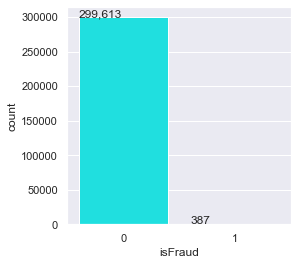

In [16]:
plt.figure(figsize=(4,4))
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train,color = "#00FFFF" )
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
            (p.get_x(), p.get_height()))

**isFraud (Dolandırıcı) Sütunları, sınıfların dengesiz olduğunu gösteriyor**



### 2 - isFlaggedFraud (Şüpheli Dolandırıcı)

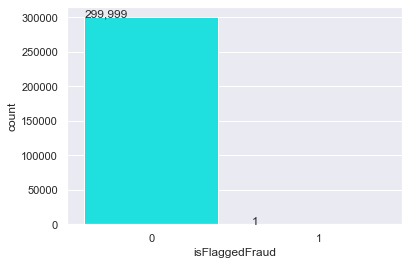

In [17]:
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFlaggedFraud", data=df_train,color = "#00FFFF")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 3 - Type (Tip)

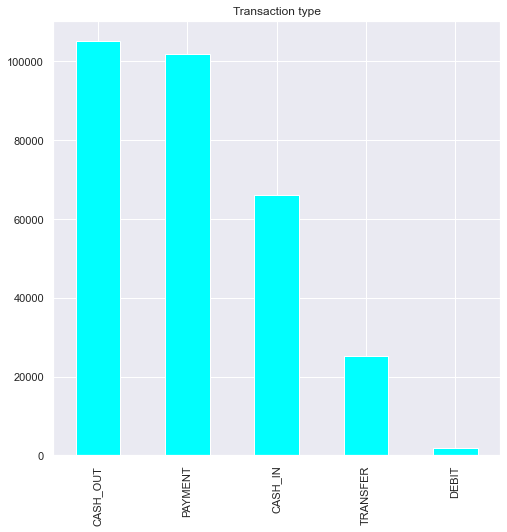

In [18]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
df_train.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color = "#00FFFF")
plt.ticklabel_format(style='plain', axis='y')

In [19]:
pd.crosstab(df_train['type'], df_train['isFraud'])

isFraud,0,1
type,,
CASH_IN,65987,0
CASH_OUT,104850,192
DEBIT,1955,0
PAYMENT,101920,0
TRANSFER,24901,195


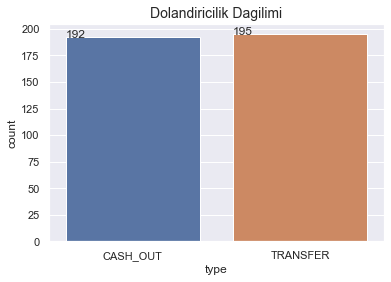

In [21]:
ax=sns.countplot('type', data=df_train[(df_train['isFraud'] == 1)])
plt.title('Dolandiricilik Dagilimi', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

Beş işlem türünden, dolandırıcılığın yalnızca ikisinde gerçekleştiğini, paranın bir müşteriye/dolandırıcıya gönderildiği **'TRANSFER'** ve müşteriye/dolandırıcıya nakit ödeme yapan bir tüccara para gönderildiği **'CASH_OUT'** işleminde gerçekleştiğini tespit ettik. Dikkat çekici bir şekilde, hileli TRANSFER'lerin sayısı, hileli CASH_OUT'ların sayısına neredeyse eşittir.

### 4 - Step (Adım)

In [22]:
fraud = df_train[df_train["isFraud"] == 1]
Notfraud = df_train[df_train["isFraud"] == 0]

In [25]:
Notfraud['İşlem Saati'] = Notfraud['step'] % 24
fraud['İşlem Saati'] = fraud['step'] % 24

## Dolandırıcılık Olmayan Dağılımı

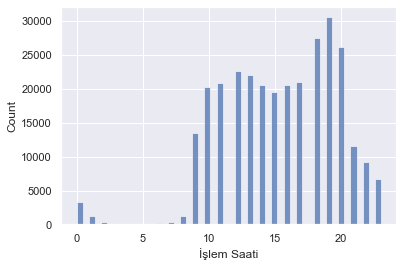

In [26]:
sns.histplot(data = Notfraud
            ,x = 'İşlem Saati'
            ,bins=50
            );

## Dolandırıcılık Dağılımı

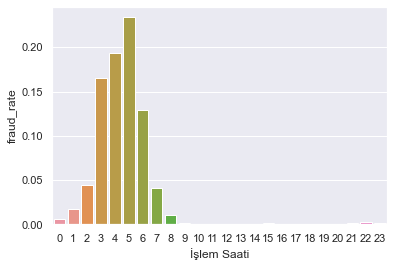

In [28]:
df_train['İşlem Saati'] = df_train['step'] % 24
frauds_hour = pd.concat([df_train.groupby("İşlem Saati")["isFraud"].sum(),df_train.groupby("İşlem Saati")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

**İlginç olabilecek bir başka analiz de, dolandırıcılık saldırılarının genellikle günün hangi saatinde gerçekleştiğidir. Step değişkeninden günün saatini alabiliriz. Aşağıdaki grafik, dolandırıcılıkları günün farklı saatlerinde göstermektedir. Dolandırıcılıkların en çok uyku saatlerinde gerçekleştiğini söylüyor. Sabah 4 ve akşam 5 arasında gerçekleşen işlemlerin %20'ye yakını dolandırıcılık işlemleridir.**

In [29]:
# Nesne türüne dönüştürme
df_train['İşlem Saati'] = df_train['İşlem Saati'].astype('object')

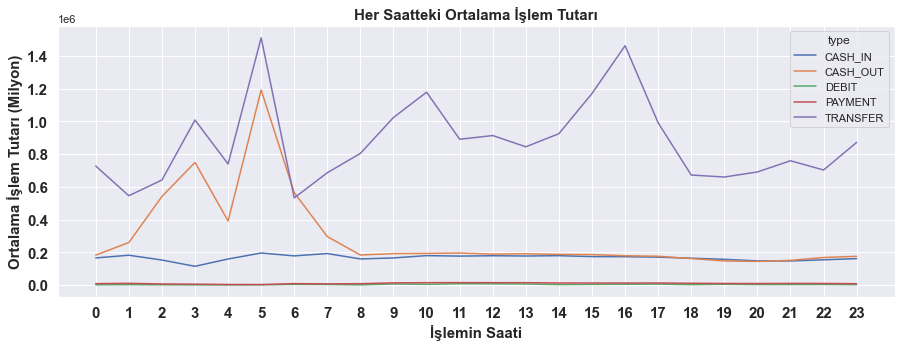

In [31]:
# Ortalama. her işlem türü için her saatteki işlem tutarı
plt.figure(figsize=(15,5))
sns.lineplot(data=df_train.groupby(['İşlem Saati','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='İşlem Saati',
             y='amount',
             hue='type')
plt.xlabel('İşlemin Saati', fontsize=15, fontweight=Ortalama. her işlem türü için her saatteki işlem tutarı'bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Ortalama İşlem Tutarı (Milyon)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Her Saatteki Ortalama İşlem Tutarı', fontsize=15, fontweight='bold')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Tutar ve Bakiye')

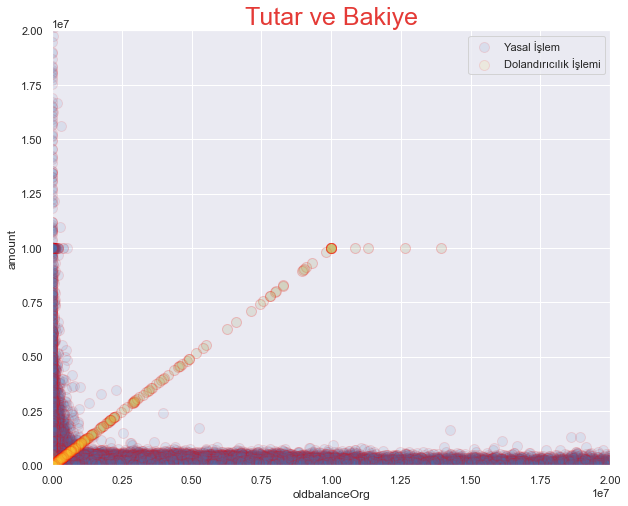

In [32]:
newscatplot=df_train[df_train['isFraud']==1]
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_ylim(0,2*1e7)
ax.set_xlim(0,2*1e7)
df_train.plot.scatter(x='oldbalanceOrg',y='amount', ax=ax,edgecolors='red',s=100,alpha=0.1,label="Yasal İşlem")
newscatplot.plot.scatter(x='oldbalanceOrg',y='amount', color='#FCD735', ax=ax,edgecolors='red',s=100,alpha=0.1,label="Dolandırıcılık İşlemi")
plt.title('Tutar ve Bakiye',fontsize=25,color='#E43A36')

**Yukarıdaki şekil, yasadışı parayı ve günlük izin verilen transfer sınırına ulaşana ve ardından durana kadar nasıl artırılacağını gösterir (örnek) Günlük izin verilen transfer limiti bu tutarda 50 ABD Dolarıdır, müşteri bu bakiyeden fazlasını transfer edemez. 24 saat tamamlandı.**

## Özellik mühendisliği

In [33]:
df_train = df_train.loc[(df_train.type == 'TRANSFER') | (df_train.type == 'CASH_OUT')]

In [34]:
df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
df_train["errorbalanceDest"] = df_train.oldbalanceDest + df_train.amount - df_train.newbalanceDest

**Daha önce görüldüğü gibi, tutar 0 olmadığında oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest'in 0 değeri, hileli işlem yapma olasılığı yüksektir, (oldbalanceOrg,newbalanceOrig,amount) ve (oldbalanceDest,newbalanceDest,amount) birleştiren yeni özellikler yaratacağız.**

# Temel Çizgi

In [35]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')],axis=1) 

In [36]:
df_train = df_train.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type","İşlem Saati"], axis = 1)

In [37]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Değer

In [39]:
df_val = df_val.loc[(df_val.type == 'TRANSFER') | (df_val.type == 'CASH_OUT')]

df_val["errorbalanceOrg"] = df_val.newbalanceOrig + df_val.amount - df_val.oldbalanceOrg
df_val["errorbalanceDest"] = df_val.oldbalanceDest + df_val.amount - df_val.newbalanceDest

df_val = pd.concat([df_val, pd.get_dummies(df_val['type'], prefix='type')],axis=1) 

df_val = df_val.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type"], axis = 1)

In [40]:
y_val = df_val["isFraud"]
X_val= df_val.drop(['isFraud'],axis=1)

# Rastgele Orman Sınıflandırıcısı

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from sklearn.metrics import confusion_matrix

# Eğitim

In [43]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_train)

# Modeli değerlendiriniz
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129751
           1       1.00      1.00      1.00       387

    accuracy                           1.00    130138
   macro avg       1.00      1.00      1.00    130138
weighted avg       1.00      1.00      1.00    130138

[[129751      0]
 [     0    387]]


# Değer

In [44]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# Modeli değerlendiriniz
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43179
           1       1.00      1.00      1.00       129

    accuracy                           1.00     43308
   macro avg       1.00      1.00      1.00     43308
weighted avg       1.00      1.00      1.00     43308

[[43179     0]
 [    0   129]]


# Test

In [45]:
df_test = df_test.loc[(df_test.type == 'TRANSFER') | (df_test.type == 'CASH_OUT')]

df_test["errorbalanceOrg"] = df_test.newbalanceOrig + df_test.amount - df_test.oldbalanceOrg
df_test["errorbalanceDest"] = df_test.oldbalanceDest + df_test.amount - df_test.newbalanceDest

df_test = pd.concat([df_test, pd.get_dummies(df_test['type'], prefix='type')],axis=1) 

df_test = df_test.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type"], axis = 1)

In [46]:
y_test = df_test["isFraud"]
X_test = df_test.drop(['isFraud'],axis=1)

In [47]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

# Modeli değerlendiriniz
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43235
           1       1.00      0.99      1.00       129

    accuracy                           1.00     43364
   macro avg       1.00      1.00      1.00     43364
weighted avg       1.00      1.00      1.00     43364

[[43235     0]
 [    1   128]]


## Eğitim ve testte doğruluğun %100 olduğunu görebiliyoruz ve bunun nedeni verilerin üretilmesidir.

-----------------------------------------------------------------------------------------------------------------------------

# Projenin Adı: Dolandırıcılık Tespiti için Sentetik Finansal Veri Kümeleri

### Kullanıldı Dil: Python 

### Ad/Soyad: Mohammad Amin / ASLAMI

### Danışman: Prof.Dr.Fatih ÖZKAYNAK

### Fakülte/Bölüm: Teknoloji Fakültesi/Yazılım Mühendisliği

### Üniversite: Fırat Üniversitesi/Elazığ